In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import copy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# %load_ext autoreload
# %autoreload 2

In [2]:
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d")
info = pd.read_csv('../data/snp_info.csv', index_col=0)

In [3]:
stocks_analysis = ['KO', 'TGT', 'PFE', 'MSFT', 'CVX', 'DVN', 'DAL', 'JPM', 'PEP', 'AAPL']

In [4]:
stocks = pd.read_csv('stocks_by_cluster.csv')
stocks

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,PEP,TGT,ABT,MSFT,CVX,DVN,DAL,JPM
1,KO,TJX,PFE,AMAT,SLB,MRO,AAL,BAC
2,PG,WBA,MDT,AAPL,COP,KMI,UAL,MS
3,PM,WMT,ABBV,INTC,HAL,WMB,UNP,C
4,MDLZ,CVS,JNJ,NFLX,XOM,MGM,FAST,KEY
5,MO,M,BSX,NVDA,CAT,HPE,IPG,SCHW
6,NWL,KR,GILD,ATVI,RF,DISCA,GM,HBAN


In [5]:
idx_dict = {}
for i in range(len(stocks.index)):
    for j in range(len(stocks.columns)):
        stock = stocks.iloc[i,j]
        idx_dict[stock] = (i,j)

In [6]:
import itertools

all_stocks = []
for i in range(len(stocks.columns)):
    all_stocks.append(list(stocks.iloc[:,i]))
all_stocks = list(itertools.chain.from_iterable(all_stocks))

---------
Get Samples and Labels
---------

In [7]:
samples = pd.read_csv('samples_cluster.csv', index_col=0, header=[0,1,2], parse_dates=True, date_parser=mydateparser)
samples.head()

Cluster     cluster_1                                                       \
Asset         asset_1                                                        
Metrics         Close        RSI  k_percent  r_percent      MACD MACD_EMA9   
Date                                                                         
2016-01-22  95.849998  46.758102  39.393925 -60.606075 -0.449477 -0.355034   
2016-01-25  95.940002  47.496642  40.757622 -59.242378 -0.390672 -0.362422   
2016-01-26  96.320000  50.819987  47.158198 -52.841802 -0.318094 -0.353299   
2016-01-27  95.940002  47.360939  46.945914 -53.054086 -0.282311 -0.338775   
2016-01-28  97.449997  59.881188  78.066898 -21.933102 -0.156237 -0.301598   

Cluster                                                                  \
Asset                                                asset_2              
Metrics    Price Rate Of Change On Balance Volume      Close        RSI   
Date                                                                      
2016-01-22            -0.013990           3217800  42.060001  55.344782   
2016-01-25            -0.015394           7624800  42.160000  57.575863   
2016-01-26            -0.013317          11360000  42.080002  55.037601   
2016-01-27            -0.005803           5564900  42.090000  55.321647   
2016-01-28             0.017117          10734800  42.570000  66.903600   

Cluster           ...                   cluster_8                            \
Asset             ...                     asset_6                   asset_7   
Metrics           ...        Price Rate Of Change On Balance Volume   Close   
Date              ...                                                         
2016-01-22        ...                   -0.109310        -121219600    9.15   
2016-01-25        ...                   -0.124217        -136501300    8.80   
2016-01-26        ...                   -0.129617        -124863700    8.05   
2016-01-27        ...                   -0.088777        -135186600    8.26   
2016-01-28        ...                   -0.117354        -147285700    8.48   

Cluster                                                          \
Asset                                                             
Metrics           RSI  k_percent  r_percent      MACD MACD_EMA9   
Date                                                              
2016-01-22  20.659193  25.892845 -74.107155 -0.166997 -0.107536   
2016-01-25  15.455201  10.267876 -89.732124 -0.194758 -0.125617   
2016-01-26   9.523649   7.801429 -92.198571 -0.258863 -0.153038   
2016-01-27  19.504577  16.475110 -83.524890 -0.291544 -0.181377   
2016-01-28  28.975531  25.291817 -74.708183 -0.299122 -0.205358   

Cluster                                            
Asset                                              
Metrics    Price Rate Of Change On Balance Volume  
Date                                               
2016-01-22            -0.089552         -59805200  
2016-01-25            -0.128713        -131099000  
2016-01-26            -0.209234        -219455100  
2016-01-27            -0.152820        -182006200  
2016-01-28            -0.139086        -154026100  

[5 rows x 448 columns]

In [8]:
labels = pd.read_csv('labels_cluster.csv', index_col='Date', parse_dates=True, date_parser=mydateparser)
labels.head()

,PEP,KO,PG,PM,MDLZ,MO,NWL,TGT,TJX,WBA,...,FAST,IPG,GM,JPM,BAC,MS,C,KEY,SCHW,HBAN
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-22,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-01-26,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-27,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-28,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


------------------------------------
Tensor Ensemble Learning
------------------------------------

In [9]:
from GRTEL.decomposition import GLTD
from GRTEL.utils import downturn_confidence, print_scores, print_1_percentage, confusion_matrix_metrics
from GRTEL.classification import GRTEL

from hottbox.core import Tensor, TensorTKD
from hottbox.pdtools import pd_to_tensor
from hottbox.algorithms.decomposition import HOSVD, HOOI
from hottbox.utils.generation import residual_tensor
from hottbox.algorithms.classification import TelVI

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
X = []
for i in range(len(samples)):
    X_t = samples.iloc[i].reorder_levels(['Metrics', 'Asset', 'Cluster']) #Make 'Cluster' the third mode of the tensor
    X.append(pd_to_tensor(X_t))

y = np.array(labels)

print(X[0], '\n\n', y[0])

This tensor is of order 3 and consists of 448 elements.
Sizes and names of its modes are (8, 7, 8) and ['Metrics', 'Asset', 'Cluster'] respectively. 

 [1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
# Represent each sample in Tucker form and store it in a list
algo = HOOI()
# algo = GLTD()
rank = (4,5,4)
X_tk = [algo.decompose(sample, rank=rank) for sample in X]


# Split into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X_tk, y, test_size=0.25, random_state=42)

test_size = 0.25
k = int(len(X_tk) * (1. - test_size))

X_train, X_test = X_tk[:k], X_tk[k:]
y_train, y_test = y[:k], y[k:]

/Users/atayardimci/opt/anaconda3/envs/GR-TEL/lib/python3.6/site-packages/hottbox/algorithms/decomposition/base.py:85: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(S)


In [12]:
# Initialise classifier
R = np.sum(rank) # number of base classifiers required per class
n_classes = 1 if y.ndim == 1 else y.shape[1]

base_clfs = []
for _ in range(n_classes):
    base_clfs.append([DecisionTreeClassifier() for _ in range(R)])

grtel = GRTEL(base_clfs=base_clfs,
              n_classes=n_classes,
              probability=True,
              verbose=False)


# Train classifer
grtel.fit(X_train, y_train)

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 


In [13]:
### Classifier performance results
# train accuracy
train_score = grtel.score(X_train, y_train)
train_accuracy_df = pd.DataFrame(np.array(train_score).reshape(stocks.shape[1], stocks.shape[0])).T
train_accuracy_df.columns = stocks.columns

# test accuracy
test_score = grtel.score(X_test, y_test)
test_accuracy_df = pd.DataFrame(np.array(test_score).reshape(stocks.shape[1], stocks.shape[0])).T
test_accuracy_df.columns = stocks.columns

# confusion matrices
conf_matrices = grtel.confusion_matrices(X_test, y_test)
conf_matrices = np.array(conf_matrices).reshape(stocks.shape[1], stocks.shape[0], 2, 2)



## Print performance results
results = pd.DataFrame(columns=all_stocks, index=['train acc', 'test acc', 'precision', 'recall', 'downturn_precision', 'specificity'], dtype=float)
for stock in all_stocks:
    idx = idx_dict[stock]
    results[stock]['train acc'] = train_accuracy_df.iloc[idx]
    results[stock]['test acc'] = test_accuracy_df.iloc[idx]
    
    conf_matrix = conf_matrices[idx[1],idx[0]]
    accuracy, precision, recall, specificity, downturn_precision = confusion_matrix_metrics(conf_matrix)
    
    results[stock]['precision'] = precision
    results[stock]['recall'] = recall
    results[stock]['downturn_precision'] = downturn_precision
    results[stock]['specificity'] = specificity
    
results

,PEP,KO,PG,PM,MDLZ,MO,NWL,TGT,TJX,WBA,...,FAST,IPG,GM,JPM,BAC,MS,C,KEY,SCHW,HBAN
train acc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test acc,0.546448,0.573770,0.464481,0.535519,0.459016,0.480874,0.551913,0.612022,0.628415,0.437158,...,0.453552,0.535519,0.573770,0.464481,0.431694,0.491803,0.508197,0.404372,0.530055,0.437158
precision,0.563380,0.589744,0.604651,0.500000,0.505263,0.496000,0.514286,0.589041,0.648148,0.641509,...,0.455782,0.545455,0.368421,0.417266,0.386555,0.385965,0.413043,0.382353,0.347826,0.454545
recall,0.792079,0.867925,0.448276,0.811765,0.480000,0.659574,0.428571,0.886598,0.905172,0.288136,...,0.770115,0.456522,0.205882,0.773333,0.597403,0.656716,0.513514,0.458824,0.222222,0.659341
downturn_precision,0.487805,0.481481,0.340206,0.644444,0.409091,0.448276,0.575221,0.702703,0.476190,0.353846,...,0.444444,0.528302,0.627586,0.613636,0.515625,0.666667,0.604396,0.432099,0.591241,0.392157
specificity,0.243902,0.168831,0.492537,0.295918,0.433735,0.292135,0.656566,0.302326,0.149254,0.707692,...,0.166667,0.615385,0.791304,0.250000,0.311321,0.396552,0.504587,0.357143,0.729730,0.217391


In [14]:
final_results = results[stocks_analysis].copy()
final_results['Average'] = final_results.mean(axis=1)
final_results['Overall'] = results.mean(axis=1)
final_results

,KO,TGT,PFE,MSFT,CVX,DVN,DAL,JPM,PEP,AAPL,Average,Overall
train acc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test acc,0.573770,0.612022,0.628415,0.573770,0.562842,0.502732,0.491803,0.464481,0.546448,0.551913,0.550820,0.508392
precision,0.589744,0.589041,0.687500,0.632000,0.542254,0.464789,0.571429,0.417266,0.563380,0.558824,0.561623,0.506921
recall,0.867925,0.886598,0.811475,0.711712,0.836957,0.383721,0.523364,0.773333,0.792079,0.606383,0.719355,0.611170
downturn_precision,0.481481,0.702703,0.410256,0.448276,0.634146,0.526786,0.400000,0.613636,0.487805,0.543210,0.524830,0.506253
specificity,0.168831,0.302326,0.262295,0.361111,0.285714,0.608247,0.447368,0.250000,0.243902,0.494382,0.342418,0.398365


In [26]:
cluster_results = pd.DataFrame(index=results.index, columns=stocks.columns)
n_clusters = len(stocks.columns)
n_per_cluster = len(stocks.index)
for i in range(n_clusters):
    l = i * n_per_cluster
    r = (i + 1) * n_per_cluster
    cluster_results.iloc[:,i] = results.iloc[:,l:r].mean(axis=1)
cluster_results

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
train acc,0.995576,0.996357,0.996357,0.995316,0.997918,0.996877,0.998959,0.992194
test acc,0.469945,0.527713,0.494145,0.491023,0.528493,0.496487,0.501952,0.451991
precision,0.517942,0.573732,0.586484,0.486009,0.476202,0.463910,0.534753,0.397259
recall,0.581710,0.585129,0.483458,0.651480,0.719668,0.514226,0.448330,0.562485
downturn_precision,0.454169,0.433499,0.370984,0.493694,0.598853,0.529522,0.495364,0.558874
specificity,0.385325,0.426640,0.473523,0.332438,0.330795,0.505875,0.578015,0.392008


In [50]:
overall_conf_matrix = np.zeros((2,2))
for stock in stocks_analysis:
    idx = idx_dict[stock]
    conf_matrix = conf_matrices[idx[1],idx[0]]
    
    overall_conf_matrix = overall_conf_matrix + conf_matrix
    
overall_conf_matrix = overall_conf_matrix / len(stocks_analysis)
overall_conf_matrix

array([[28.5, 55.4],
       [31.9, 67.2]])

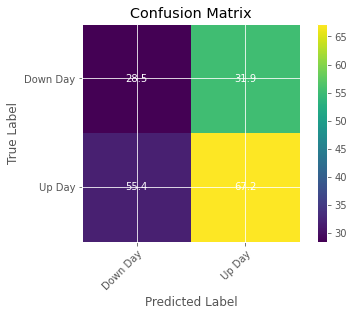

In [51]:
conf_mat = overall_conf_matrix
days = ["Down Day", "Up Day"]

fig, ax = plt.subplots()
im = ax.imshow(conf_mat)
ax.set_xticks(np.arange(len(conf_mat)))
ax.set_yticks(np.arange(len(conf_mat)))
ax.set_xticklabels(days)
ax.set_yticklabels(days)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(days)):
    for j in range(len(days)):
        text = ax.text(i, j, conf_mat[i, j], ha="center", va="center", color="w")
ax.set_title("Confusion Matrix")
ax.figure.colorbar(im, ax=ax)

In [95]:
def get_decisions(signs):
    decision = {'start': signs.index[0], 'end': None, 'val': signs[0]}
    decisions = [decision]
    for t in signs.index[1:]:
        val = signs[t]
        if decisions[-1]['val'] == val:
            continue
        else:
            decisions[-1]['end'] = t
            decision = {'start': t, 'end': None, 'val': signs[t]}
            decisions.append(decision)

    decisions[-1]['end'] = signs.index[-1]

    return decisions

In [108]:
predictions = grtel.predict(X_test)
predictions_train = grtel.predict(X_train)

predictions[23]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [109]:
aapl_preds = pd.Series(predictions[23], index = aapl.index[-183:])
aapl_preds_train = pd.Series(predictions_train[23], index = aapl.index[:-183])

# aapl_preds

In [100]:
# get_decisions(aapl_preds)

183

183.0

In [65]:
aapl = pd.read_csv('AAPL.csv', index_col=0, parse_dates=True, date_parser=mydateparser)
aapl = aapl.loc['2016-01-22':'2018-12-17']['Close'].to_frame()
aapl.head()

,Close
Date,
2016-01-22,25.355000
2016-01-25,24.860001
2016-01-26,24.997499
2016-01-27,23.355000
2016-01-28,23.522499


/Users/atayardimci/opt/anaconda3/envs/GR-TEL/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


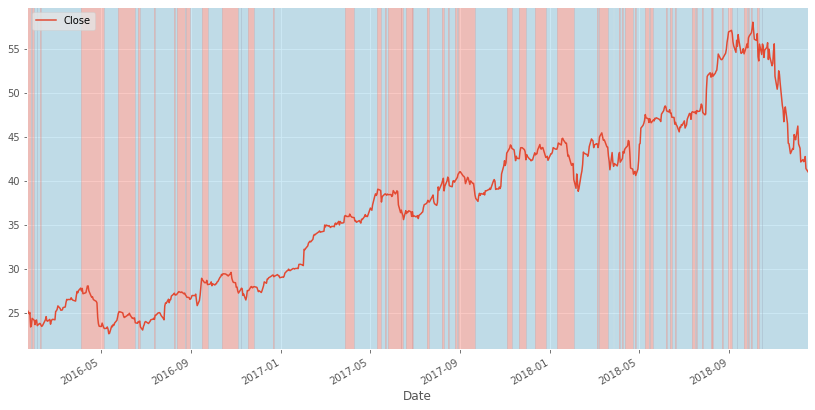

In [111]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
aapl.loc['2016-01-22':'2018-12-17'].plot(ax=ax)

decisions = get_decisions(aapl_preds)
for dec in decisions:
    ax.axvspan(dec['start'], dec['end'], alpha=0.4, color = 'skyblue' if dec['val'] == 1 else 'salmon')
    
decisions = get_decisions(aapl_preds_train)
for dec in decisions:
    ax.axvspan(dec['start'], dec['end'], alpha=0.4, color = 'skyblue' if dec['val'] == 1 else 'salmon')



/Users/atayardimci/opt/anaconda3/envs/GR-TEL/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


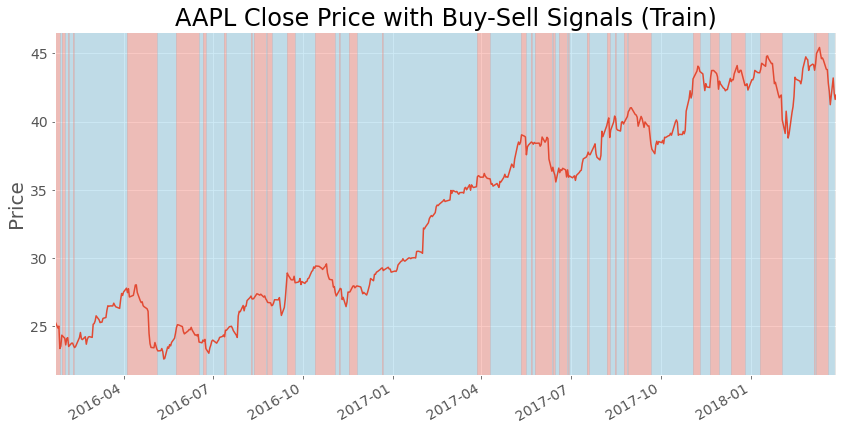

In [147]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
aapl.loc['2016-01-22':'2018-04-01'].plot(ax=ax, legend=False, fontsize=14)

decisions = get_decisions(aapl_preds_train)
for dec in decisions:
    ax.axvspan(dec['start'], dec['end'], alpha=0.4, color = 'skyblue' if dec['val'] == 1 else 'salmon')
    
ax.set_title("AAPL Close Price with Buy-Sell Signals (Train)", fontsize=24)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('')

fig.savefig('./figures/BuySellSignals_Train.png', dpi=200, bbox_inches='tight')

/Users/atayardimci/opt/anaconda3/envs/GR-TEL/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


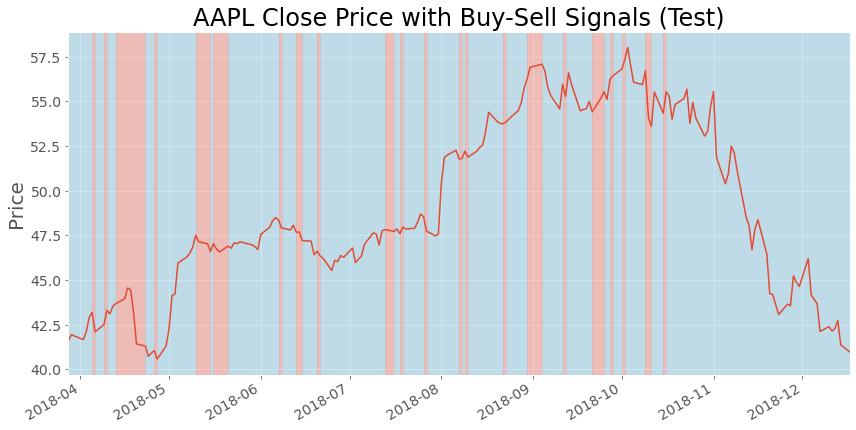

In [148]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
aapl.loc['2018-03-28':'2018-12-17'].plot(ax=ax, legend=False, fontsize=14)

decisions = get_decisions(aapl_preds)
for dec in decisions:
    ax.axvspan(dec['start'], dec['end'], alpha=0.4, color = 'skyblue' if dec['val'] == 1 else 'salmon')
    
ax.set_title("AAPL Close Price with Buy-Sell Signals (Test)", fontsize=24)
ax.set_ylabel('Price', fontsize=20)
ax.set_xlabel('')

fig.savefig('./figures/BuySellSignals_Test.png', dpi=200, bbox_inches='tight')

In [35]:
# #Scores
# score = grtel.score(X_train, y_train)
# print("\nClassification accuracy (Train):")
# print_scores(score); print()

# score = grtel.score(X_test, y_test)
# print("Classification accuracy (Test):")
# print_scores(score); print()

# print("Percentage of 1s (Test):")
# print_1_percentage(y_test, n_classes); print()

-------
Grid Search
------

In [15]:
max_features = ['auto', 'sqrt', None, 'log2']
max_depth = list(range(10, 70, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 30]
min_samples_leaf = [1, 3, 5, 7, 12, 14]

search_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

search_params = [search_grid for _ in range(R)]

print("\tPerforming grid search for each base classifer and for each class")
grtel.grid_search(X_train, y_train, search_params)

print("\tTrain base classifiers with optimal hyperparameters")
grtel.fit(X_train, y_train); print()

	Performing grid search for each base classifer and for each class
0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 
	Train base classifiers with optimal hyperparameters
0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 



In [16]:
### Classifier performance results
# train accuracy
train_score = grtel.score(X_train, y_train)
train_accuracy_df = pd.DataFrame(np.array(train_score).reshape(stocks.shape[1], stocks.shape[0])).T
train_accuracy_df.columns = stocks.columns

# test accuracy
test_score = grtel.score(X_test, y_test)
test_accuracy_df = pd.DataFrame(np.array(test_score).reshape(stocks.shape[1], stocks.shape[0])).T
test_accuracy_df.columns = stocks.columns

# confusion matrices
conf_matrices = grtel.confusion_matrices(X_test, y_test)
conf_matrices = np.array(conf_matrices).reshape(stocks.shape[1], stocks.shape[0], 2, 2)



## Print performance results
results = pd.DataFrame(columns=all_stocks, index=['train acc', 'test acc', 'precision', 'recall', 'downturn_precision', 'specificity'], dtype=float)
for stock in all_stocks:
    idx = idx_dict[stock]
    results[stock]['train acc'] = train_accuracy_df.iloc[idx]
    results[stock]['test acc'] = test_accuracy_df.iloc[idx]
    
    conf_matrix = conf_matrices[idx[1],idx[0]]
    accuracy, precision, recall, specificity, downturn_precision = confusion_matrix_metrics(conf_matrix)
    
    results[stock]['precision'] = precision
    results[stock]['recall'] = recall
    results[stock]['downturn_precision'] = downturn_precision
    results[stock]['specificity'] = specificity
    
results

,PEP,KO,PG,PM,MDLZ,MO,NWL,TGT,TJX,WBA,...,FAST,IPG,GM,JPM,BAC,MS,C,KEY,SCHW,HBAN
train acc,0.998179,0.996357,0.987250,1.000000,1.000000,0.990893,0.996357,1.000000,0.996357,0.994536,...,1.000000,0.998179,0.998179,0.950820,1.000000,1.000000,1.000000,1.000000,0.998179,0.996357
test acc,0.513661,0.480874,0.497268,0.453552,0.409836,0.486339,0.448087,0.524590,0.601093,0.584699,...,0.459016,0.508197,0.595628,0.491803,0.431694,0.508197,0.497268,0.409836,0.459016,0.366120
precision,0.574194,0.591667,0.612613,0.424779,0.505051,0.488722,0.428571,0.537415,0.617834,0.743590,...,0.460870,0.542373,0.437500,0.450820,0.395161,0.392308,0.392857,0.345238,0.366337,0.438095
recall,0.881188,0.669811,0.586207,0.564706,0.500000,0.691489,0.178571,0.814433,0.836207,0.491525,...,0.609195,0.347826,0.308824,0.733333,0.636364,0.761194,0.445946,0.341176,0.513889,0.505495
downturn_precision,0.571429,0.444444,0.333333,0.471429,0.404762,0.420000,0.533784,0.500000,0.269231,0.428571,...,0.500000,0.516129,0.651852,0.672131,0.525424,0.698113,0.585859,0.434343,0.573171,0.423077
specificity,0.195122,0.363636,0.358209,0.336735,0.409639,0.235955,0.797980,0.209302,0.104478,0.692308,...,0.354167,0.703297,0.765217,0.379630,0.292453,0.318966,0.532110,0.438776,0.423423,0.358696


In [17]:
final_results = results[stocks_analysis].copy()
final_results['Average'] = final_results.mean(axis=1)
final_results['Overall'] = results.mean(axis=1)
final_results

,KO,TGT,PFE,MSFT,CVX,DVN,DAL,JPM,PEP,AAPL,Average,Overall
train acc,0.996357,1.000000,0.990893,0.972678,1.000000,0.998179,1.000000,0.950820,0.998179,1.000000,0.990710,0.996194
test acc,0.480874,0.524590,0.486339,0.502732,0.530055,0.546448,0.459016,0.491803,0.513661,0.502732,0.503825,0.495219
precision,0.591667,0.537415,0.620370,0.575163,0.503546,0.534884,0.586957,0.450820,0.574194,0.533784,0.550880,0.504536
recall,0.669811,0.814433,0.549180,0.792793,0.771739,0.534884,0.252336,0.733333,0.881188,0.840426,0.684012,0.568311
downturn_precision,0.444444,0.500000,0.266667,0.233333,0.500000,0.587629,0.416058,0.672131,0.571429,0.571429,0.476312,0.491870
specificity,0.363636,0.209302,0.327869,0.097222,0.230769,0.587629,0.750000,0.379630,0.195122,0.224719,0.336590,0.428077


In [19]:
# score = grtel.score(X_train, y_train)
# print("Classification accuracy (Train):")
# print_scores(score); print()

# score = grtel.score(X_test, y_test)
# print("Classification accuracy (Test):")
# print_scores(score); print()

# print("Percentage of 1s (Test):")
# print_1_percentage(y_test, n_classes); print()